In [124]:
# import the required software libraries
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [125]:
co2 = pd.read_excel('/home/humphs01/Documents/ATU/programming_for_data_analysis_assignment_2/datasets/historic/grl52461-sup-0003-supplementary.xls', sheet_name="CO2 Composite", skiprows=(14))

In [126]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
co2.rename(columns=({'Gasage (yr BP)	':'gasage_yr_BP', 'CO2 (ppmv)':'co2_ppmv', 'sigma mean CO2 (ppmv)':'sigma_mean_co2_ppmv'}), inplace=True)

In [127]:
# https://bobbyhadz.com/blog/pandas-multiply-two-columns
co2['year'] = 1950-(co2['Gasage (yr BP) '])

In [128]:
co2['years_before_present'] = 2023 - co2['year']


In [130]:
co2

,Gasage (yr BP),co2_ppmv,sigma_mean_co2_ppmv,year,years_before_present
0,-51.030000,368.022488,0.060442,2001.030000,21.970000
1,-48.000000,361.780737,0.370000,1998.000000,25.000000
2,-46.279272,359.647793,0.098000,1996.279272,26.720728
3,-44.405642,357.106740,0.159923,1994.405642,28.594358
4,-43.080000,353.946685,0.043007,1993.080000,29.920000
...,...,...,...,...,...
1896,803925.284376,202.921723,2.064488,-801975.284376,803998.284376
1897,804009.870607,207.498645,0.915083,-802059.870607,804082.870607
1898,804522.674630,204.861938,1.642851,-802572.674630,804595.674630
1899,805132.442334,202.226839,0.689587,-803182.442334,805205.442334


In [131]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gasage (yr BP)        1901 non-null   float64
 1   co2_ppmv              1901 non-null   float64
 2   sigma_mean_co2_ppmv   1901 non-null   float64
 3   year                  1901 non-null   float64
 4   years_before_present  1901 non-null   float64
dtypes: float64(5)
memory usage: 74.4 KB


In [132]:
co2

,Gasage (yr BP),co2_ppmv,sigma_mean_co2_ppmv,year,years_before_present
0,-51.030000,368.022488,0.060442,2001.030000,21.970000
1,-48.000000,361.780737,0.370000,1998.000000,25.000000
2,-46.279272,359.647793,0.098000,1996.279272,26.720728
3,-44.405642,357.106740,0.159923,1994.405642,28.594358
4,-43.080000,353.946685,0.043007,1993.080000,29.920000
...,...,...,...,...,...
1896,803925.284376,202.921723,2.064488,-801975.284376,803998.284376
1897,804009.870607,207.498645,0.915083,-802059.870607,804082.870607
1898,804522.674630,204.861938,1.642851,-802572.674630,804595.674630
1899,805132.442334,202.226839,0.689587,-803182.442334,805205.442334


In [133]:
# https://stackoverflow.com/questions/27896214/reading-tab-delimited-file-with-pandas-works-on-windows-but-not-on-mac
# https://doi.pangaea.de/10.1594/PANGAEA.55505
temp = pd.read_csv('https://doi.pangaea.de/10.1594/PANGAEA.683655?format=textfile', sep="\t", skiprows=20)

In [134]:
temp.rename(columns=({"Depth ice/snow [m]":"depth_ice_snow_m", "Age model [ka]":"age_model_ka", "δD [‰ SMOW]":"δd_‰_smow", "delta T [°C]":"delta_t_c", "Sample ID":"sample_id"}), inplace=True)

In [135]:
temp.head()

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id
0,0.00,-0.050,NaN,NaN,1
1,0.55,-0.044,NaN,NaN,2
2,1.10,-0.037,NaN,NaN,3
3,1.65,-0.032,NaN,NaN,4
4,2.20,-0.025,NaN,NaN,5


In [136]:
temp['year'] = 1950-(temp['age_model_ka']*1000)

In [137]:
temp.head(5)

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id,year
0,0.00,-0.050,NaN,NaN,1,2000.0
1,0.55,-0.044,NaN,NaN,2,1994.0
2,1.10,-0.037,NaN,NaN,3,1987.0
3,1.65,-0.032,NaN,NaN,4,1982.0
4,2.20,-0.025,NaN,NaN,5,1975.0


In [138]:
temp['years_before_present'] = 2023 - temp['year']

In [140]:
temp

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id,year,years_before_present
0,0.00,-0.050,NaN,NaN,1,2000.0,23.0
1,0.55,-0.044,NaN,NaN,2,1994.0,29.0
2,1.10,-0.037,NaN,NaN,3,1987.0,36.0
3,1.65,-0.032,NaN,NaN,4,1982.0,41.0
4,2.20,-0.025,NaN,NaN,5,1975.0,48.0
...,...,...,...,...,...,...,...
5795,3187.25,797.408,-440.2,-8.73,5796,-795458.0,797481.0
5796,3187.80,798.443,-439.0,-8.54,5797,-796493.0,798516.0
5797,3188.35,799.501,-441.1,-8.88,5798,-797551.0,799574.0
5798,3188.90,800.589,-441.4,-8.92,5799,-798639.0,800662.0


In [146]:
y_temp = temp.sort_values(by='years_before_present', ascending=True, inplace=True)
y_co2 = co2.sort_values(by='years_before_present', ascending=True, inplace=True)

In [148]:
print(y_temp)

None


<function matplotlib.pyplot.show(close=None, block=None)>

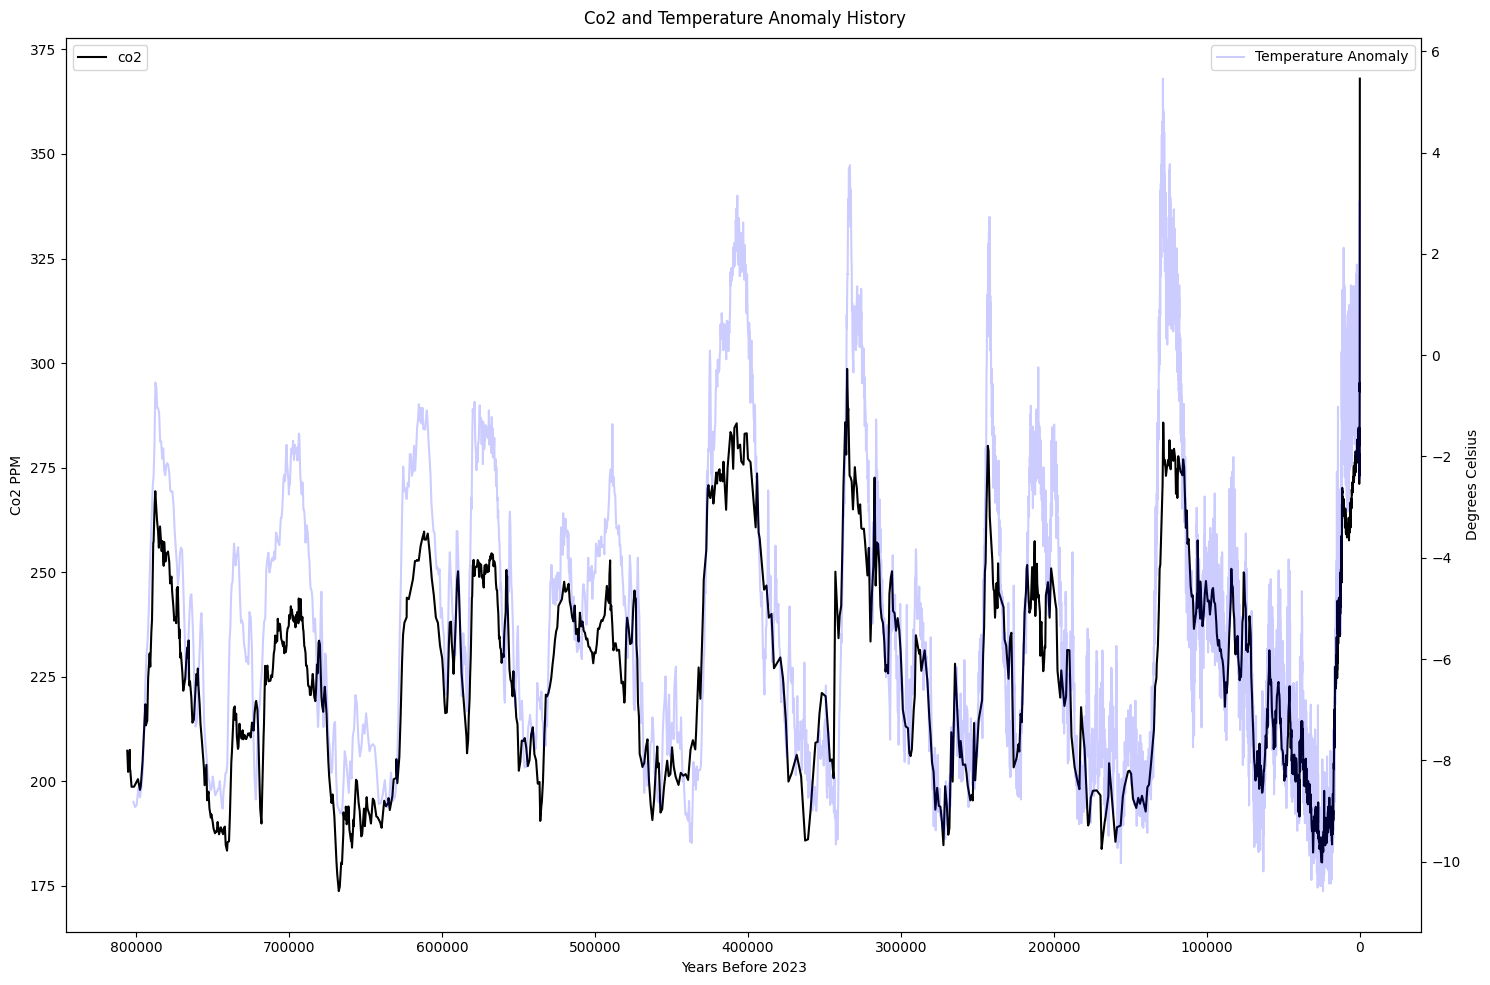

In [206]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(co2['years_before_present'], co2['co2_ppmv'], color = 'black', label='co2')
ax.legend(loc=2)
ax.set_xlabel('Years Before 2023')
ax.set_ylabel('Co2 PPM')


ax2 = ax.twinx()

ax2.plot(temp['years_before_present'], temp['delta_t_c'], color='blue', alpha=0.2, label='Temperature Anomaly')
ax2.legend(loc=1)
ax2.set_ylabel('Degrees Celsius')

plt.gca().invert_xaxis()
plt.suptitle('Co2 and Temperature Anomaly History')
fig.tight_layout()
plt.show

